## **1. Importing Tools and Data**

In [ ]:
# Import main tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import pickle

# Import logistic regression tools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
url = 'https://drive.google.com/file/d/1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0/view?usp=sharing'
url2 = 'https://drive.google.com/file/d/1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL/view?usp=sharing'

gdown.download(url, 'sales_data', quiet=False, fuzzy=True)
gdown.download(url2, 'xsell_campaign', quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1AFI3jKDmsdqEEYf0Rv51SX7lcnnDpNU0
To: /content/sales_data
100%|██████████| 1.82M/1.82M [00:00<00:00, 27.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fqsyAe2aqAz76JRNPP9J81mlK8GqbfrL
To: /content/xsell_campaign
100%|██████████| 594k/594k [00:00<00:00, 50.6MB/s]


'xsell_campaign'

In [ ]:
df_sales_OR = pd.read_pickle('sales_data')
df_campaign_OR = pd.read_pickle('xsell_campaign')

In [ ]:
df_sales_OR.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
0,100000006,X,A,88,0,25000.0,1,NaN,0,25000.0,26,5,27
1,100000038,X,A,66,0,9000.0,5,10000.0,2,10000.0,25,10,52
2,100000382,X,A,120,1,17330.0,6,16000.0,3,20000.0,18,6,70
3,100000453,X,A,85,1,14000.0,4,14670.0,3,15000.0,24,6,67
4,100000472,X,A,117,0,12500.0,1,12500.0,1,12500.0,23,5,50


In [ ]:
df_campaign_OR.head()

,account_id,xsell_success,xsell_sales,xsell_count
0,100000006,0,NaN,0.0
1,100000038,1,10000.0,2.0
2,100000382,0,NaN,0.0
3,100000453,0,NaN,0.0
4,100000472,0,NaN,0.0


In [ ]:
df_sales_OR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  int64  
 4   flag_female              16487 non-null  int64  
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  int64  
 7   avg_sales_L36M_promo     12679 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  int64  
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  int64  
 11  count_direct_promo_L12M  16487 non-null  int64  
 12  client_age               16487 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.8+ MB


In [ ]:
df_campaign_OR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 515.3+ KB


# **2. Data Preparation**

In [ ]:
# COPY BEFORE CLEANING!!

df_sales = df_sales_OR.copy()
df_campaign = df_campaign_OR.copy()

## a. Data cleaning

In [ ]:
int_data = df_sales.select_dtypes(include=['int64']).columns
int_data

Index(['MOB', 'flag_female', 'cnt_sales_L36M', 'cnt_sales_L36M_promo',
       'month_since_last_sales', 'count_direct_promo_L12M', 'client_age'],
      dtype='object')

In [ ]:
# Convert all int to float in sales data
df_sales[int_data] = df_sales[int_data].astype('float64')

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  float64
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  float64
 7   avg_sales_L36M_promo     12679 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  float64
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  float64
 11  count_direct_promo_L12M  16487 non-null  float64
 12  client_age               16487 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


In [ ]:
# Checking nulls
df_sales.isna().sum()

,0
account_id,0
account_activity_level,0
customer_value_level,0
MOB,0
flag_female,0
avg_sales_L36M,761
cnt_sales_L36M,0
avg_sales_L36M_promo,3808
cnt_sales_L36M_promo,0
last_sales,0


In [ ]:
# Checking if null data make sense
nulls_avgsalespro = df_sales[df_sales['avg_sales_L36M_promo'].isnull()]

nulls_avgsalespro # In this case it's ok because customer did not bought from direct promo, cnt sales promo = 0 also

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
0,100000006,X,A,88.0,0.0,25000.0,1.0,NaN,0.0,25000.0,26.0,5.0,27.0
8,100000862,X,A,48.0,1.0,13670.0,2.0,NaN,0.0,15000.0,17.0,5.0,45.0
14,100001433,X,A,81.0,1.0,32000.0,2.0,NaN,0.0,30000.0,25.0,6.0,41.0
30,100002370,Z,A,107.0,0.0,NaN,0.0,NaN,0.0,15000.0,56.0,3.0,51.0
32,100002468,X,A,106.0,0.0,5000.0,1.0,NaN,0.0,5000.0,14.0,3.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16454,101058421,X,E,123.0,0.0,14000.0,2.0,NaN,0.0,15000.0,24.0,6.0,44.0
16455,101058461,X,E,77.0,1.0,15000.0,2.0,NaN,0.0,20000.0,18.0,6.0,72.0
16475,101059624,X,E,29.0,0.0,13000.0,3.0,NaN,0.0,15000.0,17.0,5.0,40.0
16476,101059655,Y,E,126.0,1.0,11800.0,4.0,NaN,0.0,15000.0,14.0,5.0,47.0


In [ ]:
# Imputing null with 0
df_sales['avg_sales_L36M_promo'] = df_sales['avg_sales_L36M_promo'].fillna(0)

df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  float64
 5   avg_sales_L36M           15726 non-null  float64
 6   cnt_sales_L36M           16487 non-null  float64
 7   avg_sales_L36M_promo     16487 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  float64
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  float64
 11  count_direct_promo_L12M  16487 non-null  float64
 12  client_age               16487 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


In [ ]:
nulls_avgsales = df_sales[df_sales['avg_sales_L36M'].isnull()]

nulls_avgsales # Nulls in this case make sense because customer did not have any trx in the past 36M

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age
30,100002370,Z,A,107.0,0.0,NaN,0.0,0.0,0.0,15000.0,56.0,3.0,51.0
34,100002547,X,A,58.0,0.0,NaN,0.0,0.0,0.0,15000.0,61.0,3.0,36.0
47,100003731,X,A,51.0,1.0,NaN,0.0,0.0,0.0,15000.0,54.0,6.0,69.0
81,100005474,Z,A,53.0,0.0,NaN,0.0,0.0,0.0,15000.0,56.0,2.0,52.0
117,100008094,X,B,124.0,1.0,NaN,0.0,0.0,0.0,15000.0,53.0,3.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,101054957,Z,E,48.0,1.0,NaN,0.0,0.0,0.0,15000.0,51.0,3.0,30.0
16407,101055421,X,E,51.0,0.0,NaN,0.0,0.0,0.0,15000.0,52.0,5.0,74.0
16417,101055837,Z,E,48.0,0.0,NaN,0.0,0.0,0.0,15000.0,51.0,3.0,33.0
16438,101057435,X,E,120.0,0.0,NaN,0.0,0.0,0.0,15000.0,53.0,5.0,66.0


In [ ]:
df_sales['avg_sales_L36M'] = df_sales['avg_sales_L36M'].fillna(0) # Impute with 0 also

df_sales.info() # All cleaned

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 0 to 16486
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               16487 non-null  object 
 1   account_activity_level   16487 non-null  object 
 2   customer_value_level     16487 non-null  object 
 3   MOB                      16487 non-null  float64
 4   flag_female              16487 non-null  float64
 5   avg_sales_L36M           16487 non-null  float64
 6   cnt_sales_L36M           16487 non-null  float64
 7   avg_sales_L36M_promo     16487 non-null  float64
 8   cnt_sales_L36M_promo     16487 non-null  float64
 9   last_sales               16487 non-null  float64
 10  month_since_last_sales   16487 non-null  float64
 11  count_direct_promo_L12M  16487 non-null  float64
 12  client_age               16487 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


In [ ]:
df_sales['account_id'].duplicated().sum() # Checking dupes in account_id, all good

np.int64(0)

In [ ]:
df_sales['account_activity_level'].value_counts()

,count
account_activity_level,
X,11656
Z,3675
Y,1155
XYZ,1


In [ ]:
# XYZ is not in the data dictionary, we have to clean it
df_sales['account_activity_level'] = df_sales['account_activity_level'].replace('XYZ', 'X') # Replacing XYZ with X because it has the most amount

df_sales['account_activity_level'].value_counts()

,count
account_activity_level,
X,11657
Z,3675
Y,1155


In [ ]:
df_sales['customer_value_level'].value_counts()

,count
customer_value_level,
E,5868
B,3071
A,2937
C,2683
D,1927
F,1


In [ ]:
# F is not in the dictionary, we will do the same as XYZ since its only 1 record
df_sales['customer_value_level'] = df_sales['customer_value_level'].replace('F', 'E')

df_sales['customer_value_level'].value_counts()

,count
customer_value_level,
E,5869
B,3071
A,2937
C,2683
D,1927


In [ ]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  int64  
 2   xsell_sales    2946 non-null   float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 515.3+ KB


In [ ]:
df_campaign['xsell_success'] = df_campaign['xsell_success'].astype('float64') # Converting int column to float
df_campaign['xsell_sales'] = df_campaign['xsell_sales'].fillna(0) # Fill Na with 0, most Na caused by not successful xsell

df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16487 entries, 0 to 16486
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   account_id     16487 non-null  object 
 1   xsell_success  16487 non-null  float64
 2   xsell_sales    16487 non-null  float64
 3   xsell_count    16487 non-null  float64
dtypes: float64(3), object(1)
memory usage: 515.3+ KB


In [ ]:
df_campaign[(df_campaign_OR['xsell_success'] == 1) & (df_campaign_OR['xsell_sales'] == 0.0)]

# We discovered that some user might activate the promo but did not purchase anything, this would be considered 0 in our target

,account_id,xsell_success,xsell_sales,xsell_count
620,100038577,1.0,0.0,1.0
833,100051948,1.0,0.0,2.0
2589,100163504,1.0,0.0,2.0
2631,100166420,1.0,0.0,1.0
3051,100196266,1.0,0.0,1.0
3058,100197215,1.0,0.0,1.0
3617,100231211,1.0,0.0,2.0
3637,100232209,1.0,0.0,1.0
3962,100251652,1.0,0.0,2.0
4549,100288031,1.0,0.0,2.0


In [ ]:
df_campaign['target'] = np.where(
    (df_campaign['xsell_success'] == 1) &
    (df_campaign['xsell_sales'] > 0),
    1.0, 0.0
)

df_campaign

,account_id,xsell_success,xsell_sales,xsell_count,target
0,100000006,0.0,0.0,0.0,0.0
1,100000038,1.0,10000.0,2.0,1.0
2,100000382,0.0,0.0,0.0,0.0
3,100000453,0.0,0.0,0.0,0.0
4,100000472,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16482,101059900,0.0,0.0,0.0,0.0
16483,101059915,0.0,0.0,0.0,0.0
16484,101059935,0.0,0.0,0.0,0.0
16485,101059941,0.0,0.0,0.0,0.0


In [ ]:
df_campaign[(df_campaign['xsell_success'] == 1) & (df_campaign['xsell_sales'] == 0.0)]

# xsell_success = 1 but no sales are now considered 0 in our target

,account_id,xsell_success,xsell_sales,xsell_count,target
620,100038577,1.0,0.0,1.0,0.0
833,100051948,1.0,0.0,2.0,0.0
2589,100163504,1.0,0.0,2.0,0.0
2631,100166420,1.0,0.0,1.0,0.0
3051,100196266,1.0,0.0,1.0,0.0
3058,100197215,1.0,0.0,1.0,0.0
3617,100231211,1.0,0.0,2.0,0.0
3637,100232209,1.0,0.0,1.0,0.0
3962,100251652,1.0,0.0,2.0,0.0
4549,100288031,1.0,0.0,2.0,0.0


In [ ]:
df_campaign['target'].value_counts()

,count
target,
0.0,13577
1.0,2910


In [ ]:
df_campaign['account_id'].duplicated().sum()

np.int64(0)

## b. Merging cleaned data

In [ ]:
df_target = df_campaign[['account_id', 'target']] # We only need the success status to be our target column
df_target.head()

,account_id,target
0,100000006,0.0
1,100000038,1.0
2,100000382,0.0
3,100000453,0.0
4,100000472,0.0


In [ ]:
# Merging both data
df_merged = df_sales.merge(df_target, on='account_id', how='left').set_index('account_id')

df_merged.head()

,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,last_sales,month_since_last_sales,count_direct_promo_L12M,client_age,target
account_id,,,,,,,,,,,,,
100000006,X,A,88.0,0.0,25000.0,1.0,0.0,0.0,25000.0,26.0,5.0,27.0,0.0
100000038,X,A,66.0,0.0,9000.0,5.0,10000.0,2.0,10000.0,25.0,10.0,52.0,1.0
100000382,X,A,120.0,1.0,17330.0,6.0,16000.0,3.0,20000.0,18.0,6.0,70.0,0.0
100000453,X,A,85.0,1.0,14000.0,4.0,14670.0,3.0,15000.0,24.0,6.0,67.0,0.0
100000472,X,A,117.0,0.0,12500.0,1.0,12500.0,1.0,12500.0,23.0,5.0,50.0,0.0


In [ ]:
df_merged['target'].value_counts()

,count
target,
0.0,13577
1.0,2910


# **3. Feature Engineering**

## a. Potential leak removal

In [ ]:
potential_leak = ['last_sales', 'month_since_last_sales'] # As it is not specified wether these columns have been adjusted to cutoff date, we will remove to reduce leakage risk
df_merged = df_merged.drop(columns=potential_leak)

## b. Encoding categorical features

In [ ]:
cat_col = df_merged.select_dtypes(exclude='number').columns
cat_col

Index(['account_activity_level', 'customer_value_level'], dtype='object')

In [ ]:
cat_col = list(cat_col)

cat_col

['account_activity_level', 'customer_value_level']

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df_encoded = pd.get_dummies(df_merged, columns=cat_col, dtype=float, drop_first=False)

df_encoded

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,count_direct_promo_L12M,client_age,target,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,,
100000006,88.0,0.0,25000.0,1.0,0.0,0.0,5.0,27.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000038,66.0,0.0,9000.0,5.0,10000.0,2.0,10.0,52.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000382,120.0,1.0,17330.0,6.0,16000.0,3.0,6.0,70.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000453,85.0,1.0,14000.0,4.0,14670.0,3.0,6.0,67.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000472,117.0,0.0,12500.0,1.0,12500.0,1.0,5.0,50.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,18.0,1.0,15000.0,1.0,15000.0,1.0,3.0,53.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101059915,16.0,0.0,20000.0,1.0,0.0,0.0,4.0,71.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
101059935,18.0,0.0,20000.0,1.0,20000.0,1.0,4.0,42.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16487 entries, 100000006 to 101060006
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       16487 non-null  float64
 1   flag_female               16487 non-null  float64
 2   avg_sales_L36M            16487 non-null  float64
 3   cnt_sales_L36M            16487 non-null  float64
 4   avg_sales_L36M_promo      16487 non-null  float64
 5   cnt_sales_L36M_promo      16487 non-null  float64
 6   count_direct_promo_L12M   16487 non-null  float64
 7   client_age                16487 non-null  float64
 8   target                    16487 non-null  float64
 9   account_activity_level_X  16487 non-null  float64
 10  account_activity_level_Y  16487 non-null  float64
 11  account_activity_level_Z  16487 non-null  float64
 12  customer_value_level_A    16487 non-null  float64
 13  customer_value_level_B    16487 non-null  float64
 14 

# **4. Splitting Training and Testing Set**

In [ ]:
features = df_encoded.drop(columns='target').copy() # x
label = df_encoded['target'].copy() # y

In [ ]:
features.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,,,
100000006,88.0,0.0,25000.0,1.0,0.0,0.0,5.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000038,66.0,0.0,9000.0,5.0,10000.0,2.0,10.0,52.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000382,120.0,1.0,17330.0,6.0,16000.0,3.0,6.0,70.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000453,85.0,1.0,14000.0,4.0,14670.0,3.0,6.0,67.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
100000472,117.0,0.0,12500.0,1.0,12500.0,1.0,5.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
label.head()

,target
account_id,
100000006,0.0
100000038,1.0
100000382,0.0
100000453,0.0
100000472,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=80)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13189 entries, 100125707 to 100336614
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       13189 non-null  float64
 1   flag_female               13189 non-null  float64
 2   avg_sales_L36M            13189 non-null  float64
 3   cnt_sales_L36M            13189 non-null  float64
 4   avg_sales_L36M_promo      13189 non-null  float64
 5   cnt_sales_L36M_promo      13189 non-null  float64
 6   count_direct_promo_L12M   13189 non-null  float64
 7   client_age                13189 non-null  float64
 8   account_activity_level_X  13189 non-null  float64
 9   account_activity_level_Y  13189 non-null  float64
 10  account_activity_level_Z  13189 non-null  float64
 11  customer_value_level_A    13189 non-null  float64
 12  customer_value_level_B    13189 non-null  float64
 13  customer_value_level_C    13189 non-null  float64
 14 

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3298 entries, 100276079 to 100565687
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       3298 non-null   float64
 1   flag_female               3298 non-null   float64
 2   avg_sales_L36M            3298 non-null   float64
 3   cnt_sales_L36M            3298 non-null   float64
 4   avg_sales_L36M_promo      3298 non-null   float64
 5   cnt_sales_L36M_promo      3298 non-null   float64
 6   count_direct_promo_L12M   3298 non-null   float64
 7   client_age                3298 non-null   float64
 8   account_activity_level_X  3298 non-null   float64
 9   account_activity_level_Y  3298 non-null   float64
 10  account_activity_level_Z  3298 non-null   float64
 11  customer_value_level_A    3298 non-null   float64
 12  customer_value_level_B    3298 non-null   float64
 13  customer_value_level_C    3298 non-null   float64
 14  

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 13189 entries, 100125707 to 100336614
Series name: target
Non-Null Count  Dtype  
--------------  -----  
13189 non-null  float64
dtypes: float64(1)
memory usage: 206.1+ KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 3298 entries, 100276079 to 100565687
Series name: target
Non-Null Count  Dtype  
--------------  -----  
3298 non-null   float64
dtypes: float64(1)
memory usage: 51.5+ KB


In [ ]:
for df in [x_train, x_test, y_train, y_test]:
  print(df.shape)

(13189, 16)
(3298, 16)
(13189,)
(3298,)


# **5. EDA**

## a. Checking for imbalance in our target dataset

<Axes: xlabel='target'>

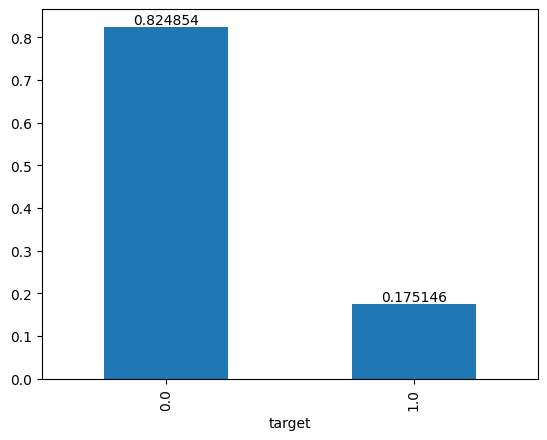

In [ ]:
y_value =y_train.value_counts(normalize=True).plot(kind='bar')
plt.bar_label(y_value.containers[0])

plt.savefig("target_balance.png", dpi=300, bbox_inches='tight')
y_value # There's medium imbalance in our target data, might have to use class_weight='balance' in our model later on

## b. Exploring features data

In [ ]:
training_set = pd.concat([x_train, y_train], axis=1)

training_set.head()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E,target
account_id,,,,,,,,,,,,,,,,,
100125707,88.0,0.0,17000.0,2.0,0.0,0.0,6.0,74.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
100995679,42.0,1.0,18330.0,3.0,15000.0,1.0,6.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100866278,30.0,0.0,9750.0,5.0,9670.0,4.0,7.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100743663,79.0,0.0,5000.0,8.0,5000.0,8.0,7.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
100862272,19.0,1.0,15000.0,1.0,15000.0,1.0,3.0,51.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Getting list of our binary features
binary_col = []

for col in x_train.columns:
  if training_set[col].nunique() == 2:
    binary_col.append(col)

binary_col

['flag_female',
 'account_activity_level_X',
 'account_activity_level_Y',
 'account_activity_level_Z',
 'customer_value_level_A',
 'customer_value_level_B',
 'customer_value_level_C',
 'customer_value_level_D',
 'customer_value_level_E']

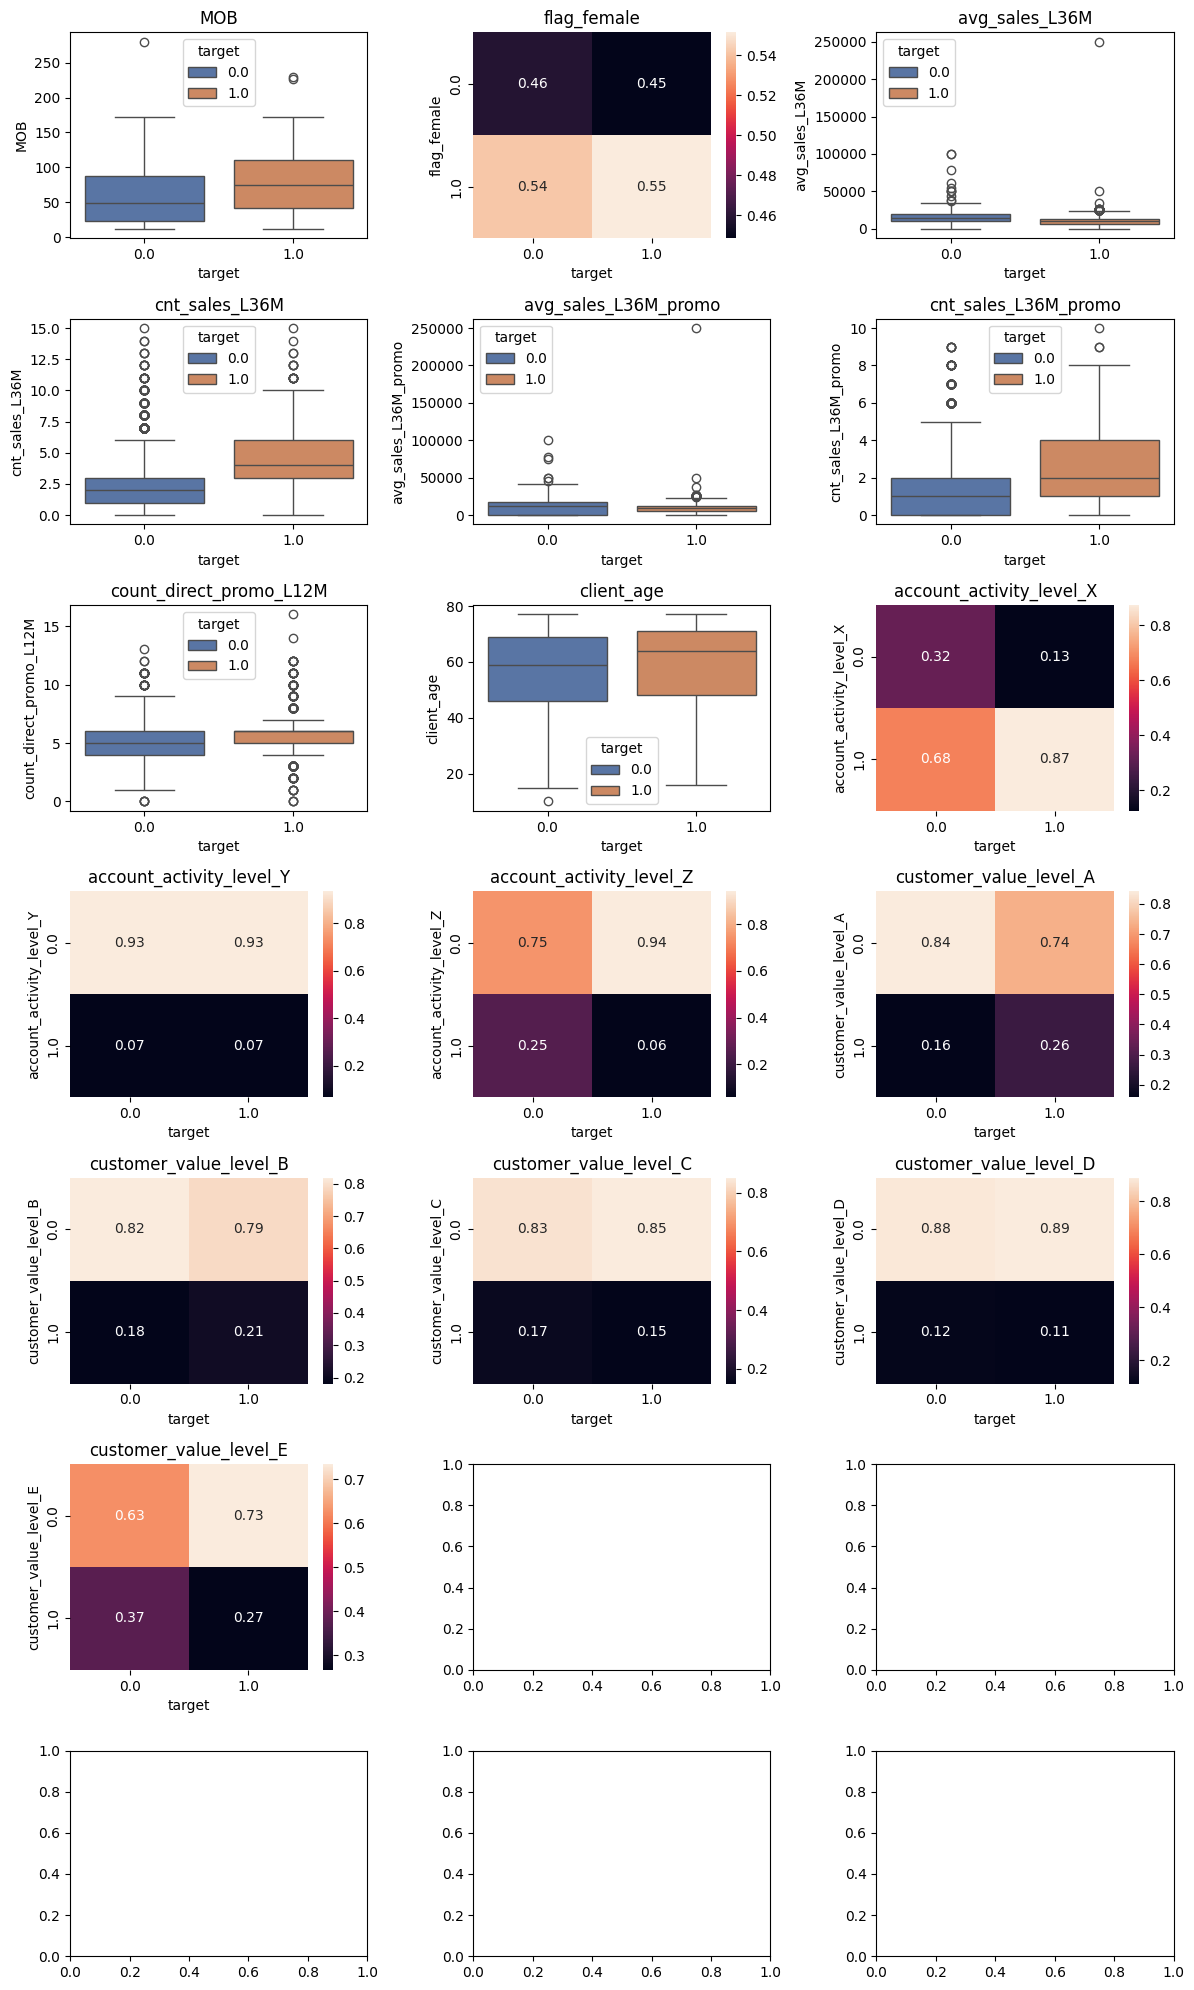

In [ ]:
# Checking features comparison towards target
fig, ax = plt.subplots(7, 3, figsize=(12, 20))

for index, col in enumerate(x_train.columns):
  ax.flatten()[index].set_title(col)

  if col in binary_col:
    data = training_set[['target', col]].groupby('target').value_counts(normalize=True).reset_index()
    data = data.pivot(columns='target', index=col, values='proportion')
    sns.heatmap(data, annot=True, fmt=',.2f', ax=ax.flatten()[index])

  else:
    sns.boxplot(data=training_set, x='target', y=col, hue='target', palette='deep', ax=ax.flatten()[index])

plt.tight_layout();

In [ ]:
# Checking correlation between features
x_train.corr()

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,cnt_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,account_activity_level_Z,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
MOB,1.000000,0.034908,-0.278948,0.256648,-0.245123,0.116341,0.195628,0.228909,0.522639,-0.011837,-0.564847,-0.037508,-0.026902,0.000770,-0.001158,0.051948
flag_female,0.034908,1.000000,-0.034345,0.032337,-0.019846,0.018521,-0.014116,-0.047936,0.022563,0.005615,-0.028143,-0.010322,-0.012214,-0.000437,0.008104,0.013050
avg_sales_L36M,-0.278948,-0.034345,1.000000,-0.287511,0.589944,-0.207144,0.092765,-0.055887,-0.200604,0.003068,0.217710,0.065148,0.021400,-0.021592,0.005503,-0.056315
cnt_sales_L36M,0.256648,0.032337,-0.287511,1.000000,-0.015548,0.826258,0.501266,0.087783,0.370690,-0.039650,-0.381452,-0.020491,-0.023664,0.005275,-0.002282,0.033024
avg_sales_L36M_promo,-0.245123,-0.019846,0.589944,-0.015548,1.000000,0.222746,0.159822,-0.039496,-0.189155,-0.009382,0.212816,0.055022,0.021884,-0.003857,-0.008439,-0.052988
cnt_sales_L36M_promo,0.116341,0.018521,-0.207144,0.826258,0.222746,1.000000,0.408294,0.043325,0.200837,-0.032614,-0.199839,0.007472,-0.010651,0.009551,-0.010749,0.002541
count_direct_promo_L12M,0.195628,-0.014116,0.092765,0.501266,0.159822,0.408294,1.000000,0.076732,0.343315,-0.112497,-0.306794,0.011830,-0.016484,-0.001799,0.010846,-0.001920
client_age,0.228909,-0.047936,-0.055887,0.087783,-0.039496,0.043325,0.076732,1.000000,0.101569,0.008224,-0.116228,0.003637,-0.020484,0.002155,-0.025202,0.029026
account_activity_level_X,0.522639,0.022563,-0.200604,0.370690,-0.189155,0.200837,0.343315,0.101569,1.000000,-0.427846,-0.832168,0.019905,-0.035063,-0.007006,0.001443,0.017098
account_activity_level_Y,-0.011837,0.005615,0.003068,-0.039650,-0.009382,-0.032614,-0.112497,0.008224,-0.427846,1.000000,-0.145167,-0.099253,0.041699,0.022373,-0.004054,0.030609


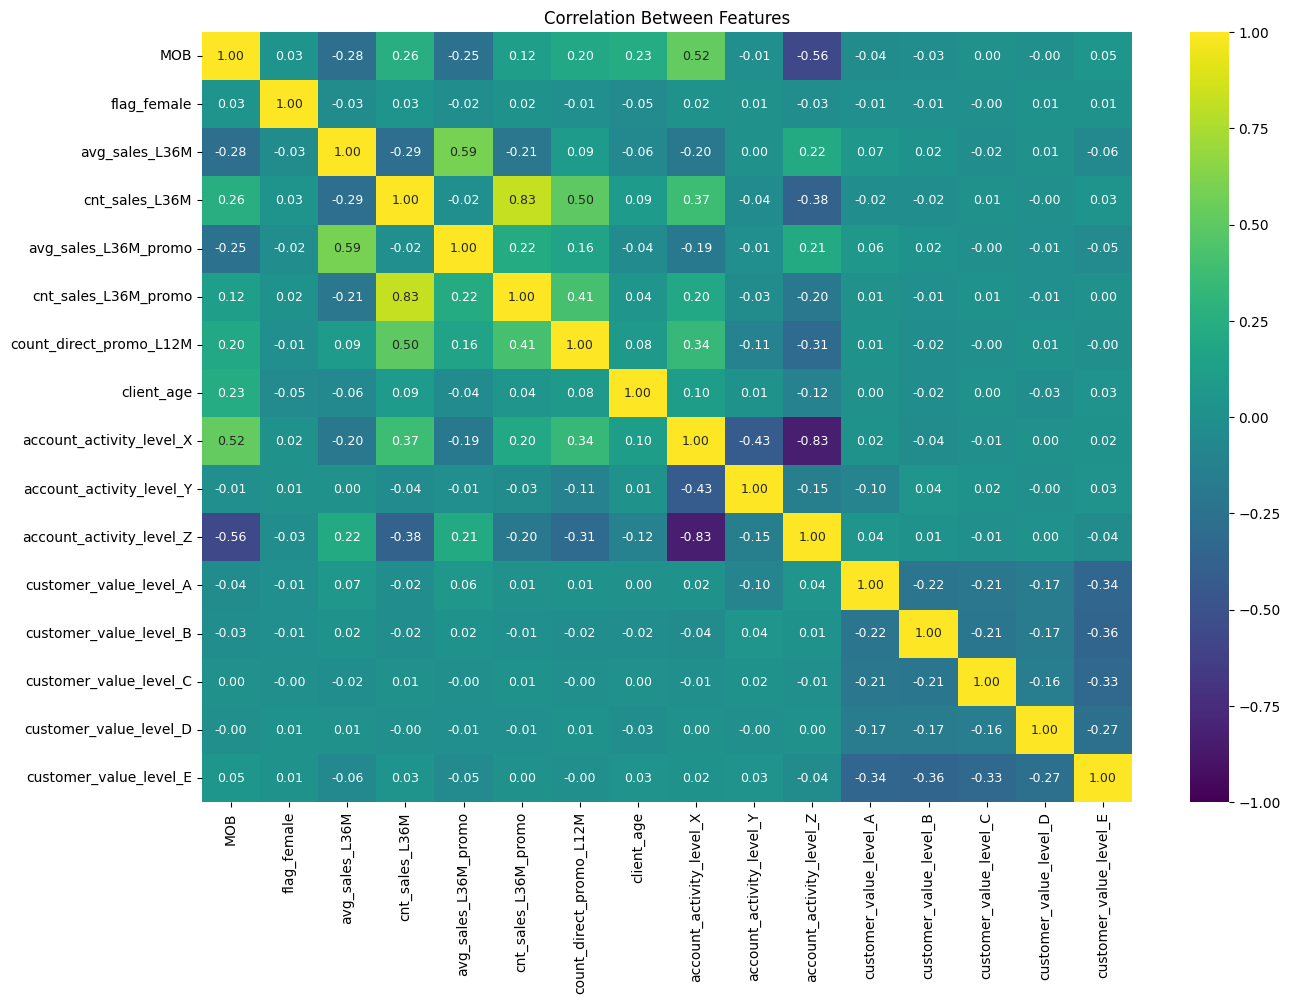

In [ ]:
plt.subplots(figsize=(15,10))
plt.title('Correlation Between Features')
sns.heatmap(x_train.corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'viridis',
            annot = True,
            annot_kws = {'fontsize': 9},
            fmt = ',.2f'
            );
plt.savefig('multocil.png', dpi=300, bbox_inches='tight')

In [ ]:
# Some features have high correlation with other features, we will drop some of these features and make new set for our training and testing model
features_to_remove = ['cnt_sales_L36M_promo', 'account_activity_level_Z']

x_train_model = x_train.drop(columns=features_to_remove)
x_test_model = x_test.drop(columns=features_to_remove)

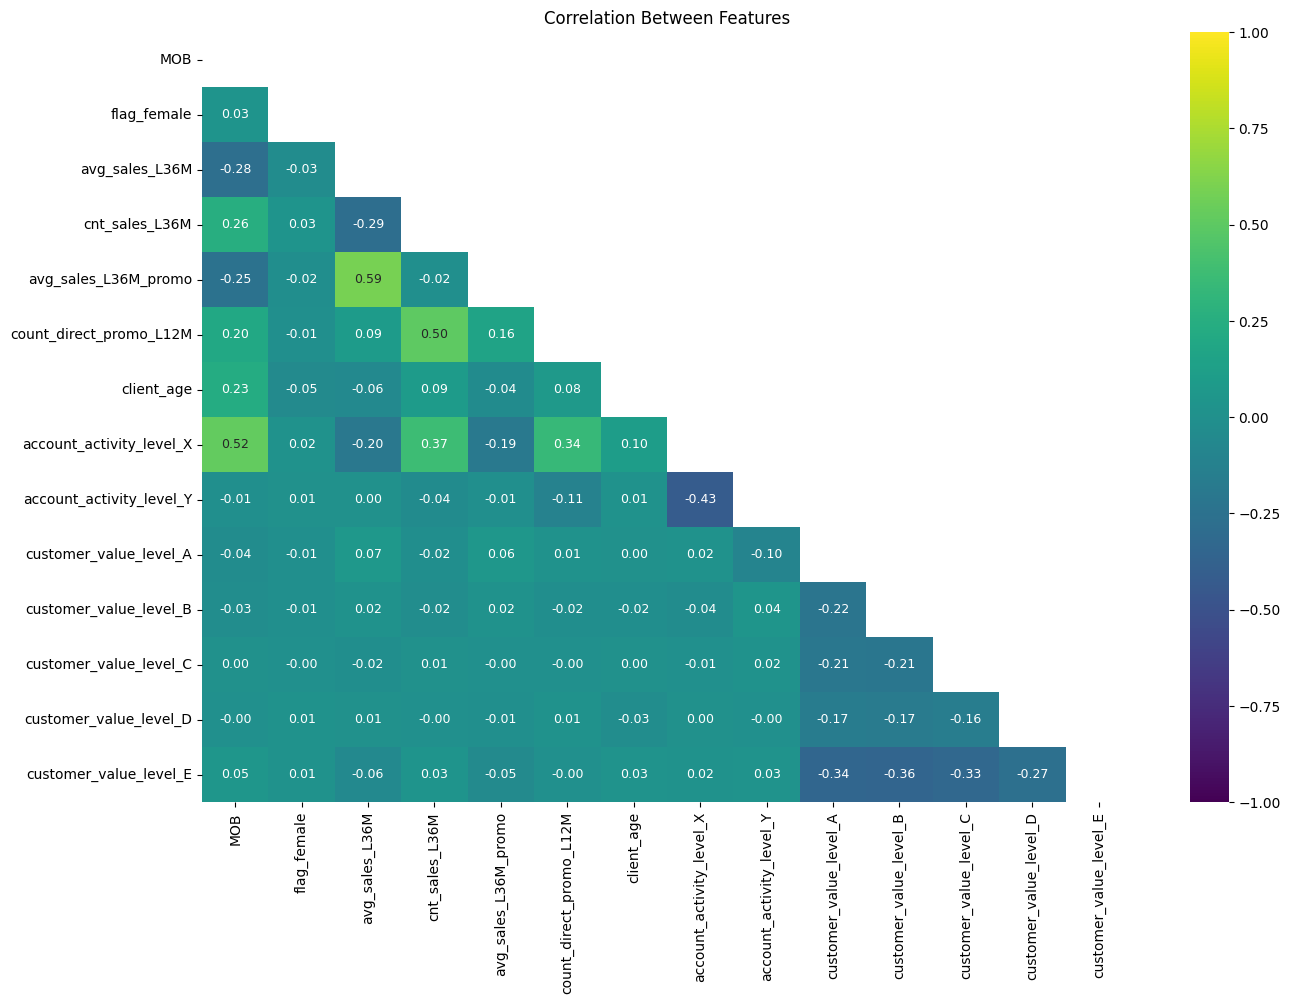

In [ ]:
plt.subplots(figsize=(15,10))
plt.title('Correlation Between Features')
mask = np.triu(np.ones_like(x_train_model.corr(), dtype=bool))

sns.heatmap(x_train_model.corr(),
            vmin = -1,
            vmax = 1,
            cmap = 'viridis',
            annot = True,
            annot_kws = {'fontsize': 9},
            fmt = ',.2f',
            mask=mask
            ); # Highest correlation coeficient is 0.6 which is < 0.7 so it is not a strong one

plt.savefig('multocil_res.png', dpi=300, bbox_inches='tight')

# **6. Train the Model**

## a. Model training

In [ ]:
model = LogisticRegression(class_weight='balanced', max_iter=500)

model.fit(x_train_model, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
x_train_model

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,
100125707,88.0,0.0,17000.0,2.0,0.0,6.0,74.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100995679,42.0,1.0,18330.0,3.0,15000.0,6.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
100866278,30.0,0.0,9750.0,5.0,9670.0,7.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100743663,79.0,0.0,5000.0,8.0,5000.0,7.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100862272,19.0,1.0,15000.0,1.0,15000.0,3.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100490838,67.0,1.0,25000.0,2.0,25000.0,7.0,59.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100974139,38.0,1.0,8500.0,6.0,8250.0,6.0,53.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
100557815,21.0,1.0,20000.0,1.0,20000.0,3.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y_train.unique()

array([0., 1.])

In [ ]:
model.predict_proba(x_train_model)

array([[0.73656301, 0.26343699],
       [0.69678131, 0.30321869],
       [0.40392094, 0.59607906],
       ...,
       [0.92371306, 0.07628694],
       [0.55269794, 0.44730206],
       [0.4805411 , 0.5194589 ]])

In [ ]:
model.predict(x_train_model)

array([0., 0., 1., ..., 0., 0., 1.])

## b. Apply to training data

In [ ]:
x_train_res = x_train_model.copy()

x_train_res['prediction'] = model.predict(x_train_model)
x_train_res[['prob_n', 'prob_y']] = model.predict_proba(x_train_model)

x_train_res[['prob_y', 'prediction']].head()

,prob_y,prediction
account_id,,
100125707,0.263437,0.0
100995679,0.303219,0.0
100866278,0.596079,1.0
100743663,0.911396,1.0
100862272,0.111342,0.0


## c. Apply to testing data

In [ ]:
x_test_res = x_test_model.copy()

x_test_res['prediction'] = model.predict(x_test_model)
x_test_res[['prob_n', 'prob_y']] = model.predict_proba(x_test_model)

x_test_res[['prob_y', 'prediction']].head()

,prob_y,prediction
account_id,,
100276079,0.595685,1.0
100784028,0.314920,0.0
100437458,0.497093,0.0
100990248,0.314126,0.0
100510974,0.716709,1.0


# **7. Model Evaluation**

## a. Accuracy Check

In [ ]:
train_accuracy = model.score(x_train_model, y_train)
test_accuracy = model.score(x_test_model, y_test)

print(f'Training model accuracy is : {train_accuracy}')
print(f'Test model accuracy is     : {test_accuracy}')

Training model accuracy is : 0.7538099931761316
Test model accuracy is     : 0.769860521528199


Accuracy is above 70%, this model is considered accurate, but test accuracy is > than training model, probably underfitted

## b. Confusion matrix and classification report

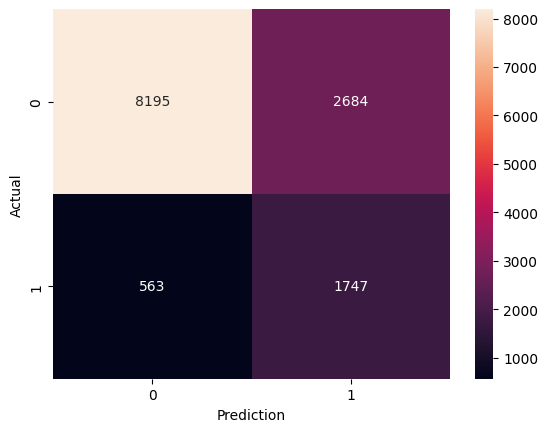

In [ ]:
confusion_train_set = confusion_matrix(y_train, model.predict(x_train_model))

sns.heatmap(confusion_train_set, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.savefig('confmtrx_train.png', dpi=300, bbox_inches='tight')
plt.show()

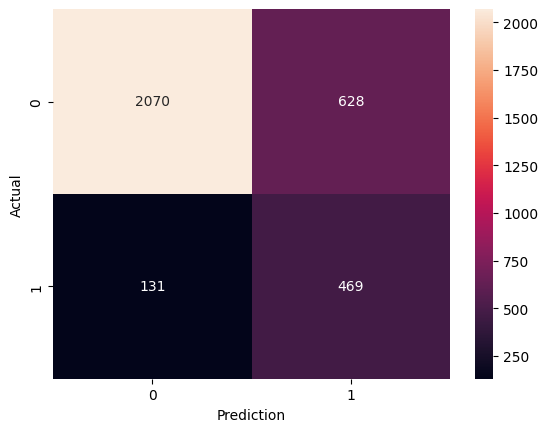

In [ ]:
confusion_test_set = confusion_matrix(y_test, model.predict(x_test_model))

sns.heatmap(confusion_test_set, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Actual')

plt.savefig('confmtrx_test.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
y_predict = model.predict(x_train_model)

print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83     10879
         1.0       0.39      0.76      0.52      2310

    accuracy                           0.75     13189
   macro avg       0.66      0.75      0.68     13189
weighted avg       0.84      0.75      0.78     13189



In [ ]:
print(classification_report(y_test, model.predict(x_test_model)))

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      2698
         1.0       0.43      0.78      0.55       600

    accuracy                           0.77      3298
   macro avg       0.68      0.77      0.70      3298
weighted avg       0.85      0.77      0.79      3298



## c. AUC-ROC curve

In [ ]:
y_train_score = model.predict_proba(x_train_model)[:, 1]
y_test_score = model.predict_proba(x_test_model)[:, 1]

print(y_train_score)
print(y_test_score)

[0.26343699 0.30321869 0.59607906 ... 0.07628694 0.44730206 0.5194589 ]
[0.59568539 0.3149197  0.49709322 ... 0.95650981 0.05113891 0.31376068]


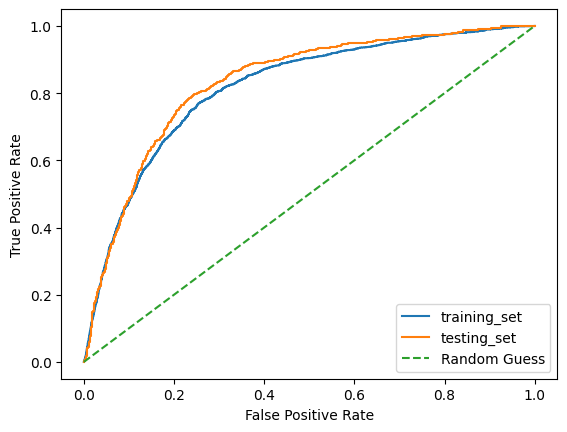

In [ ]:
fpr_train, tpr_train,_ = roc_curve(y_train, y_train_score)
fpr_test, tpr_test,_ = roc_curve(y_test, y_test_score)

plt.plot(
    fpr_train,
    tpr_train,
    label='training_set'
)

plt.plot(
    fpr_test,
    tpr_test,
    label='testing_set'
)

plt.plot([0,1],[0,1],
         linestyle='--',
         label='Random Guess')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

print(f'AUC for training set is : {auc_train}')
print(f'AUC for test set is     : {auc_test}')

AUC for training set is : 0.8162135716414602
AUC for test set is     : 0.8315857425253272


## d. Decile performance

In [ ]:
decile_performance = x_test_model.copy()
decile_performance['predict'] = model.predict(x_test_model)
decile_performance[['prob_n', 'prob_y']] = model.predict_proba(x_test_model)

decile_performance = decile_performance[['prob_y', 'predict']]
decile_performance.describe()

,prob_y,predict
count,3.298000e+03,3298.000000
mean,4.102518e-01,0.332626
std,2.516512e-01,0.471225
min,3.140340e-08,0.000000
25%,1.991861e-01,0.000000
50%,3.543309e-01,0.000000
75%,5.953265e-01,1.000000
max,9.968189e-01,1.000000


In [ ]:
decile_performance = decile_performance.merge(y_test, left_index=True, right_index=True)
decile_performance['bins'] = pd.qcut(decile_performance['prob_y'], q=10, precision=5)

decile_performance

,prob_y,predict,target,bins
account_id,,,,
100276079,0.595685,1.0,1.0,"(0.53937, 0.66064]"
100784028,0.314920,0.0,0.0,"(0.28977, 0.35433]"
100437458,0.497093,0.0,0.0,"(0.4382, 0.53937]"
100990248,0.314126,0.0,1.0,"(0.28977, 0.35433]"
100510974,0.716709,1.0,0.0,"(0.66064, 0.80587]"
...,...,...,...,...
100954597,0.185501,0.0,0.0,"(0.16628, 0.2288]"
100698300,0.547495,1.0,0.0,"(0.53937, 0.66064]"
100188201,0.956510,1.0,0.0,"(0.80587, 0.99682]"


In [ ]:
df_dp = decile_performance[['target', 'bins']].value_counts().sort_index(ascending=False).reset_index()
df_dp

,target,bins,count
0,0.0,"(-9.968597000000002e-06, 0.1155]",324
1,0.0,"(0.1155, 0.16628]",319
2,0.0,"(0.16628, 0.2288]",320
3,0.0,"(0.2288, 0.28977]",316
4,0.0,"(0.28977, 0.35433]",308
5,0.0,"(0.35433, 0.4382]",293
6,0.0,"(0.4382, 0.53937]",271
7,0.0,"(0.53937, 0.66064]",222
8,0.0,"(0.66064, 0.80587]",183
9,0.0,"(0.80587, 0.99682]",142


In [ ]:
df_dp = df_dp.pivot(index='bins', columns='target', values='count')
df_dp.columns = ['actual_no_xsell', 'actual_xsell']

df_dp

,actual_no_xsell,actual_xsell
bins,,
"(-9.968597000000002e-06, 0.1155]",324,6
"(0.1155, 0.16628]",319,11
"(0.16628, 0.2288]",320,10
"(0.2288, 0.28977]",316,13
"(0.28977, 0.35433]",308,22
"(0.35433, 0.4382]",293,37
"(0.4382, 0.53937]",271,58
"(0.53937, 0.66064]",222,108
"(0.66064, 0.80587]",183,147


In [ ]:
df_dp['total_observed'] = df_dp['actual_no_xsell'] + df_dp['actual_xsell'] # Add total observed column
df_dp['response_rate'] = df_dp['actual_xsell'] / df_dp['total_observed'] #Add probability of actual xsell takers

no_xsell_total = df_dp['actual_no_xsell'].sum() # For rates calculation below
xsell_total = df_dp['actual_xsell'].sum()

df_dp['%actual_no_xsell'] = df_dp['actual_no_xsell'] / no_xsell_total # Add proportion of actual non xsell taker from total non xsell taker observed
df_dp['%actual_xsell'] = df_dp['actual_xsell'] / xsell_total # Add proportion of actual xsell taker from total xsell taker observed

df_dp['cumm%_no_xsell'] = df_dp['%actual_no_xsell'].cumsum() # Add cumulative sum of actual non xsell taker proprtion in each probability category
df_dp['cumm%_xsell'] = df_dp['%actual_xsell'].cumsum() # Add cumulative sum of actual xsell taker proprtion in each probability category

df_dp

,actual_no_xsell,actual_xsell,total_observed,response_rate,%actual_no_xsell,%actual_xsell,cumm%_no_xsell,cumm%_xsell
bins,,,,,,,,
"(-9.968597000000002e-06, 0.1155]",324,6,330,0.018182,0.120089,0.010000,0.120089,0.010000
"(0.1155, 0.16628]",319,11,330,0.033333,0.118236,0.018333,0.238325,0.028333
"(0.16628, 0.2288]",320,10,330,0.030303,0.118606,0.016667,0.356931,0.045000
"(0.2288, 0.28977]",316,13,329,0.039514,0.117124,0.021667,0.474055,0.066667
"(0.28977, 0.35433]",308,22,330,0.066667,0.114159,0.036667,0.588213,0.103333
"(0.35433, 0.4382]",293,37,330,0.112121,0.108599,0.061667,0.696812,0.165000
"(0.4382, 0.53937]",271,58,329,0.176292,0.100445,0.096667,0.797257,0.261667
"(0.53937, 0.66064]",222,108,330,0.327273,0.082283,0.180000,0.879540,0.441667
"(0.66064, 0.80587]",183,147,330,0.445455,0.067828,0.245000,0.947368,0.686667


In [ ]:
actualtaker = (188+147+108)/(df_dp['actual_xsell'].sum())
actualtaker

np.float64(0.7383333333333333)

In [ ]:
(188+147+108)/(330*3)

0.44747474747474747

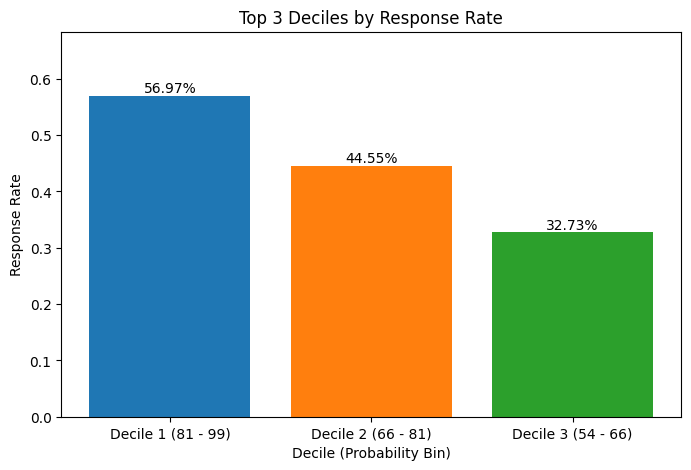

In [ ]:
# Sort bins by response_rate and take top 3
top3 = df_dp.sort_values(by="response_rate", ascending=False).head(3)

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(top3.index.astype(str), top3['response_rate'], color=['#1f77b4','#ff7f0e','#2ca02c'])

# Add labels
plt.title("Top 3 Deciles by Response Rate")
plt.xlabel("Decile (Probability Bin)")
plt.ylabel("Response Rate")
plt.xticks([0, 1, 2], ["Decile 1 (81 - 99)", "Decile 2 (66 - 81)", "Decile 3 (54 - 66)"])
plt.ylim(0, top3['response_rate'].max() * 1.2)

# Add bar labels with percentage formatting
for bar, rate in zip(bars, top3['response_rate']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f"{rate:.2%}", ha='center', va='bottom', fontsize=10)

plt.savefig('decile_perf.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
ks_stats = 100*(df_dp['cumm%_no_xsell'] - df_dp['cumm%_xsell']).max()
ks_stats

53.55905609093155

KS Statistic > 40 means model is good for production!

# **8. Deployment**

In [ ]:
x_train_model

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,
100125707,88.0,0.0,17000.0,2.0,0.0,6.0,74.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100995679,42.0,1.0,18330.0,3.0,15000.0,6.0,50.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
100866278,30.0,0.0,9750.0,5.0,9670.0,7.0,48.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100743663,79.0,0.0,5000.0,8.0,5000.0,7.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
100862272,19.0,1.0,15000.0,1.0,15000.0,3.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100490838,67.0,1.0,25000.0,2.0,25000.0,7.0,59.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
100974139,38.0,1.0,8500.0,6.0,8250.0,6.0,53.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
100557815,21.0,1.0,20000.0,1.0,20000.0,3.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
model_features = x_train_model.columns
model_features

Index(['MOB', 'flag_female', 'avg_sales_L36M', 'cnt_sales_L36M',
       'avg_sales_L36M_promo', 'count_direct_promo_L12M', 'client_age',
       'account_activity_level_X', 'account_activity_level_Y',
       'customer_value_level_A', 'customer_value_level_B',
       'customer_value_level_C', 'customer_value_level_D',
       'customer_value_level_E'],
      dtype='object')

In [ ]:
target_data = df_encoded[df_encoded['target'] == 0]

target_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13577 entries, 100000006 to 101060006
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MOB                       13577 non-null  float64
 1   flag_female               13577 non-null  float64
 2   avg_sales_L36M            13577 non-null  float64
 3   cnt_sales_L36M            13577 non-null  float64
 4   avg_sales_L36M_promo      13577 non-null  float64
 5   cnt_sales_L36M_promo      13577 non-null  float64
 6   count_direct_promo_L12M   13577 non-null  float64
 7   client_age                13577 non-null  float64
 8   target                    13577 non-null  float64
 9   account_activity_level_X  13577 non-null  float64
 10  account_activity_level_Y  13577 non-null  float64
 11  account_activity_level_Z  13577 non-null  float64
 12  customer_value_level_A    13577 non-null  float64
 13  customer_value_level_B    13577 non-null  float64
 14 

In [ ]:
target_data = target_data[model_features]

target_data

,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,avg_sales_L36M_promo,count_direct_promo_L12M,client_age,account_activity_level_X,account_activity_level_Y,customer_value_level_A,customer_value_level_B,customer_value_level_C,customer_value_level_D,customer_value_level_E
account_id,,,,,,,,,,,,,,
100000006,88.0,0.0,25000.0,1.0,0.0,5.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100000382,120.0,1.0,17330.0,6.0,16000.0,6.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100000453,85.0,1.0,14000.0,4.0,14670.0,6.0,67.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100000472,117.0,0.0,12500.0,1.0,12500.0,5.0,50.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
100000757,37.0,0.0,25000.0,3.0,23330.0,5.0,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059900,18.0,1.0,15000.0,1.0,15000.0,3.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101059915,16.0,0.0,20000.0,1.0,0.0,4.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
101059935,18.0,0.0,20000.0,1.0,20000.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
pred_result = target_data.copy()

pred_result['prediction'] = model.predict(target_data)
pred_result[['prob_n', 'prob_y']] = model.predict_proba(target_data)

final_result = pred_result[['prob_y', 'prediction']].sort_values(by='prob_y', ascending=False).head(1000)
final_result

,prob_y,prediction
account_id,,
100680212,0.997433,1.0
100198377,0.995907,1.0
100015368,0.995120,1.0
100096455,0.994661,1.0
100382668,0.994293,1.0
...,...,...
100227200,0.746336,1.0
100398281,0.746274,1.0
100234426,0.746138,1.0


In [ ]:
final_result.to_csv('final_result.csv', index=True)

In [ ]:
final_result.describe()

,prob_y,prediction
count,1000.000000,1000.0
mean,0.848167,1.0
std,0.070262,0.0
min,0.745261,1.0
25%,0.786369,1.0
50%,0.838921,1.0
75%,0.903364,1.0
max,0.997433,1.0
